# Principal Component Analysis

## import library

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [315]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

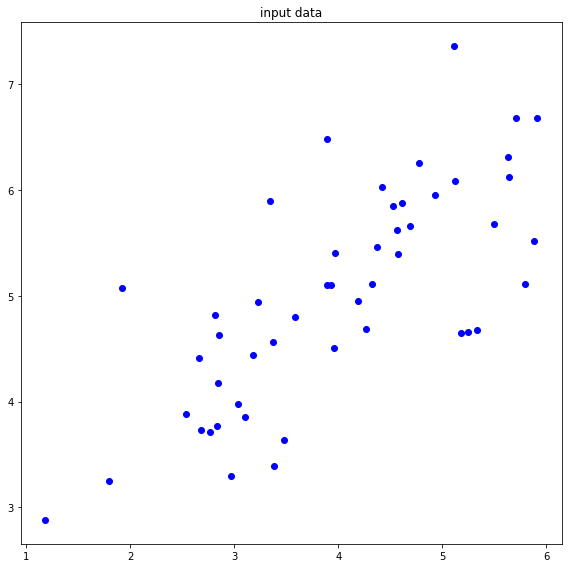

In [316]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [317]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    x = feature[:,0]
    y = feature[:,1]
    x_mean = x.mean()
    y_mean = y.mean()
    
    x = (x - x_mean)/x.std()
    y = (y - y_mean)/y.std()
    
    feature_normalize = np.zeros((feature[:,0].size,2))
    feature_normalize[:,0] = x
    feature_normalize[:,1] = y
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize


In [318]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [319]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_data = np.size(feature, 0)
    Sigma = np.matmul(feature.T, feature) / number_data

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [320]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    S, U = np.linalg.eig(Sigma)  #  Eigenvalue: S, Eigenvector: U
    # print(S)
    # print(U)
    # S = np.argsort(S)
    sort_value = S.argsort()
    S = S[sort_value[::-1]]
    
    
    principal_component_1 = S[0] * U[:, 0]
    principal_component_2 = S[1] * U[:, 1]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

print(compute_principal_component(feature))

(array([1.22720503, 1.22720503]), array([-0.18700853,  0.18700853]))


## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [364]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # projection = np.zeros_like(feature)
    # for i in range(np.size(feature, 0)):
    # feature (50,2), vector는 (1,2)
    temp = (np.dot(feature, vector) / np.dot(vector,vector)).reshape(50,1)
    projection = np.matmul(temp, vector.reshape(1,2))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return projection

## compute the principal components and the projection of feature

In [365]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

[[1.22720503]
 [1.22720503]]
[1.22720503 1.22720503]
[[1.22720503 1.22720503]]
[[1.22720503 1.22720503]]
[[-0.18700853]
 [ 0.18700853]]
[-0.18700853  0.18700853]
[[-0.18700853  0.18700853]]
[[-0.18700853  0.18700853]]


---

---

## functions for presenting the results

---

---

In [323]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [324]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    plt.scatter(x, y, marker= 'o', color='blue')
    
    plt.arrow(0,0,principal_component_1[0],principal_component_1[1], width= 0.02, head_width= 0.09, head_length = 0.12, color='red')
    plt.arrow(0,0,principal_component_2[0],principal_component_2[1], width= 0.02, head_width= 0.09, head_length = 0.12, color='green')
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [325]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    S, U = np.linalg.eig(Sigma)
    
    plt.scatter(x, y, marker= 'o', color='blue')
    plt.plot([-5*U[0][0], 5*U[0][0]], [-5*U[1][0], 5*U[1][0]], color='red')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [326]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    S, U = np.linalg.eig(Sigma)
    
    plt.scatter(x, y, marker= 'o', color='blue')
    plt.plot([-5*U[0][1], 5*U[0][1]], [-5*U[1][1], 5*U[1][1]], color='red')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [327]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    S, U = np.linalg.eig(Sigma)
    
    plt.scatter(x, y, marker= 'o', color='blue')
    plt.plot([-5*U[0][0], 5*U[0][0]], [-5*U[1][0], 5*U[1][0]], color='red')

    
    plt.scatter(projection1[:,0], projection1[:,1], marker= 'o', c= "g")

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [328]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    S, U = np.linalg.eig(Sigma)
    
    plt.scatter(x, y, marker= 'o', color='blue')
    plt.plot([-5*U[0][1], 5*U[0][1]], [-5*U[1][1], 5*U[1][1]], color='red')

    plt.scatter(projection2[:,0], projection2[:,1], marker='o', c= "g")



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [329]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    S, U = np.linalg.eig(Sigma)
    
    plt.scatter(x, y, marker= 'o', color='blue')
    plt.plot([-5*U[0][0], 5*U[0][0]], [-5*U[1][0], 5*U[1][0]], color='red')

    plt.scatter(projection1[:,0], projection1[:,1], marker = 'o', c= "g")

    for i in range(number_data):
        plt.plot([feature[i,0], projection1[i,0]], [feature[i,1], projection1[i,1]],'-',color='gray')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [330]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    S, U = np.linalg.eig(Sigma)
    
    plt.scatter(x, y, marker= 'o', color='blue')
    plt.plot([-5*U[0][1], 5*U[0][1]], [-5*U[1][1], 5*U[1][1]], color='red')

    plt.scatter(projection2[:,0], projection2[:,1], marker = 'o', c= "g")

    for i in range(number_data):
        plt.plot([feature[i,0], projection2[i,0]], [feature[i,1], projection2[i,1]],'-',color='gray')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


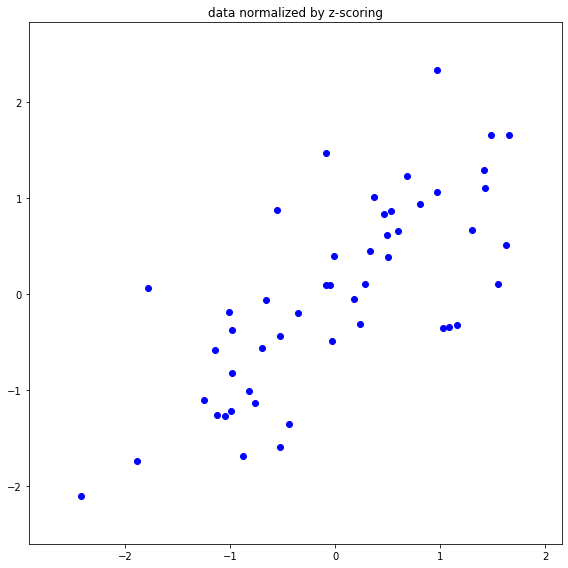

**************************************************
## [RESULT 02]
**************************************************


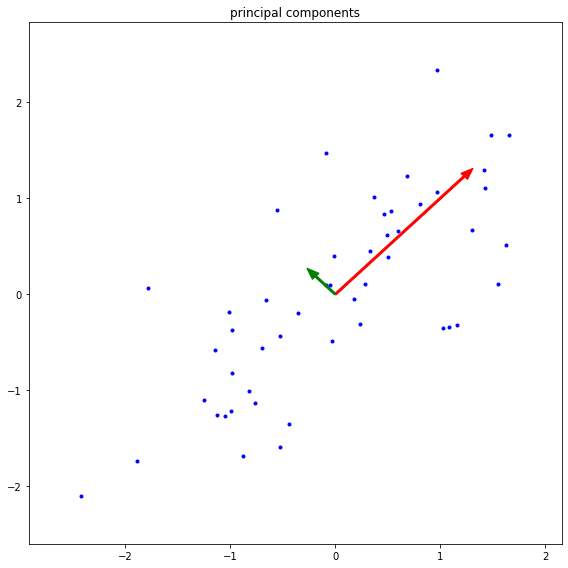

**************************************************
## [RESULT 03]
**************************************************


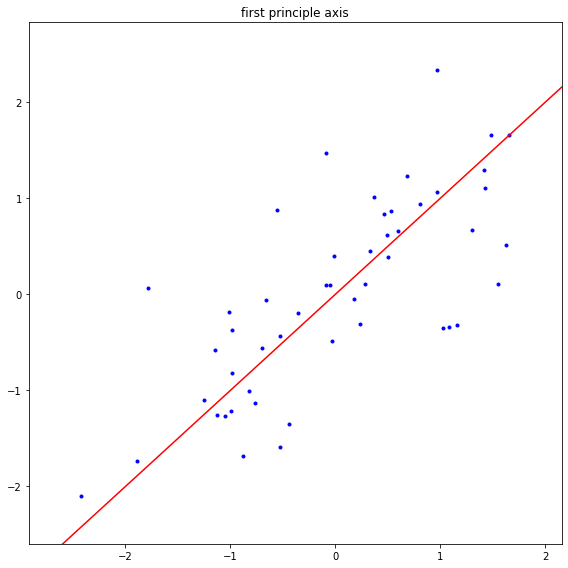

**************************************************
## [RESULT 04]
**************************************************


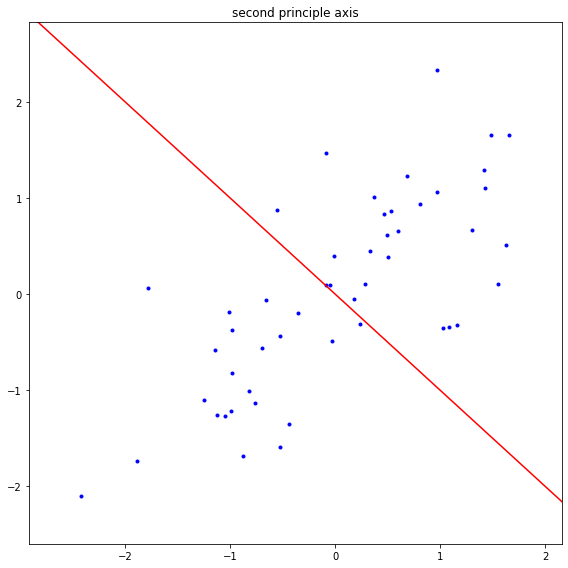

**************************************************
## [RESULT 05]
**************************************************


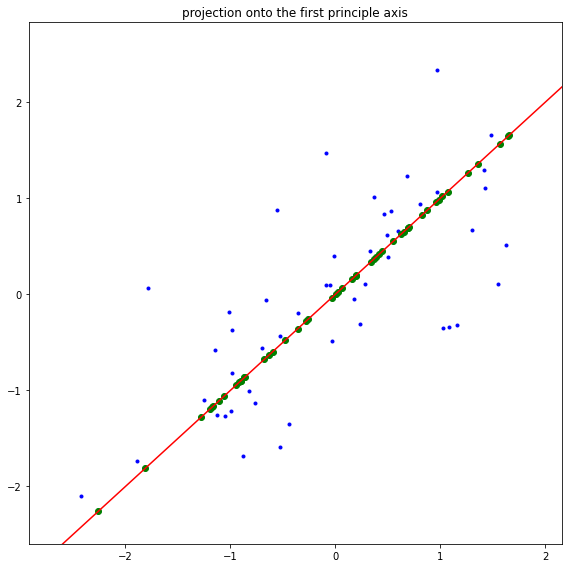

**************************************************
## [RESULT 06]
**************************************************


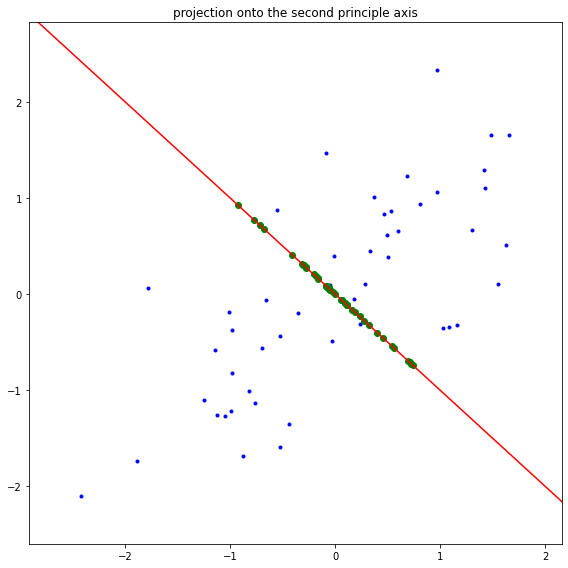

**************************************************
## [RESULT 07]
**************************************************


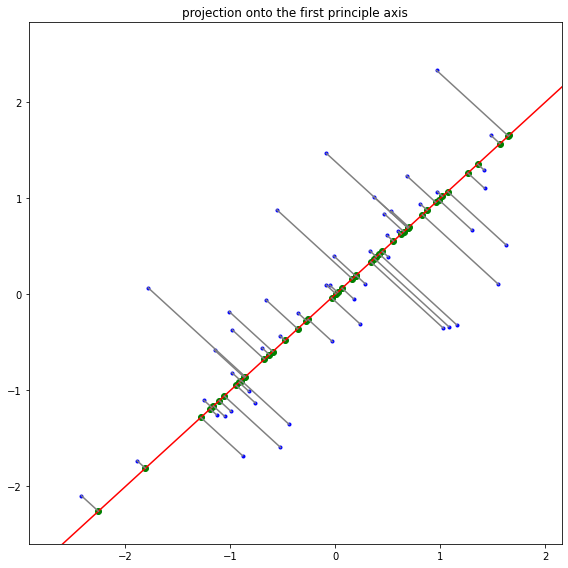

**************************************************
## [RESULT 08]
**************************************************


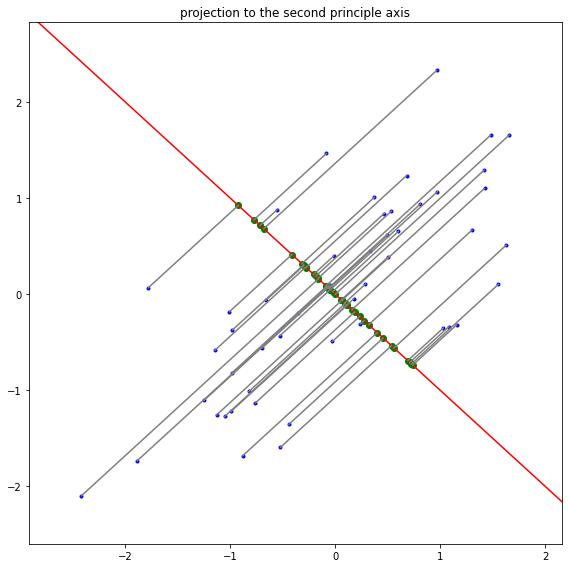

In [331]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)